- https://wikidocs.net/8229

# 객체지향프로그래밍
- OOP(object-oriented programming): 소프트웨어도 객체로 구성하는 방법
- 객체들은 객체 나름대로 고유한 기능을 수행하면서 다른 객체들과 메시지를 통하여 상호 작용

![OOP](/images/OOP.png)

## 절차 지향과 객체 지향 차이
- 절차 지향 프로그래밍(procedural programming): 프로시저(procedure)를 기반으로 하는 프로그래밍.
- 객체 지향 프로그래밍: 데이터와 함수를 하나의 덩어리로 묶어서 생각하는 방법

![OOP비교](../images/OOP비교.png)

## 클래스와 객체
- **객체**: 
    - 현실세계의 사물 또는 개념
    - 속성(attribute와 행동(action)으로 구성
    - 속성은 변수로, 행동은 함수로 정의
    
![객체_속성_행동](../images/자동차객체.png)

- **클래스(class)**
    - 객체를 설계하는 설계도, 특정한 종류의 객체들을 찍어내는 형틀(template) 혹은 청사진(blueprint)
    - 객체가 가져야 할 기본 정보를 담은 코드
    - 인스턴스(instance): 클래스로부터 만들어지는 객체

![class_instance](../images/class_instance.png)

# 클래스 구현

![클래스선언](../images/그림10-3_p332.png)

- 상속: 기존에 만든 클래스의 특징을 이어받음(**재사용성**)
- 클래스 이름 작명: CamelCase(첫글자와 중간글자가 대문자)

## 속성의 선언
- \_\_init\_\_(): 
    - 클래스에서 사용할 변수를 정의
    - self변수: 인스턴스에 접근하는 예약어

![image.png](../images/class_속성_P333.png)

## 함수의 선언

![class_함수](../images/class_함수선언_P334.png)

- self가 있어야만 실제로 인스턴스가 사용할 수 있는 함수로 선언된다

## 클래스 \_\_ (dunder:double under) 명명법
    - 특수한 예약 함수나 변수
    - 연산자 오버로딩
    - __init__메소드는 생성자: 초기화할때 호출되는 함수, 클래스의 인스턴스가 생성될때 실행
    - __repr__ 메소드: 객체가 가진 정보를 한 줄의 문자열로 만들어 반환
    - __str__ 메소드: 객체의 문자열 표현을 반환

In [2]:
import datetime
today = datetime.datetime.now()
print(str(today))
print(repr(today))

2022-10-20 10:44:24.256868
datetime.datetime(2022, 10, 20, 10, 44, 24, 256868)


# 인스턴스 호출

![인스턴스호출](../images/그림10-4_p336.png)

In [ ]:
#전체 SoccerPlayer 코드
class SoccerPlayer(object):
    def __init__(self, name, position, back_number):
        self.name = name
        self.position = position
        self.back_number = back_number
    def change_back_number(self, new_number):
        print("선수의 등번호를 변경한다: From %d to %d" % (self.back_number, new_number))
        self.back_number = new_number
    def __str__(self):
        return "Hello, My name is %s. I play in %s in center." % (self.name, self.position)

# SoccerPlayer를 사용하는 instance 코드
jinhyun = SoccerPlayer("Jinhyun", "MF", 10)

print("현재 선수의 등번호는:", jinhyun.back_number)
jinhyun.change_back_number(5)
print("현재 선수의 등번호는:", jinhyun.back_number)
print(jinhyun)   # __str__ 메소드 실행

# Lab. 노트북 프로그램 만들기

![class_lab](../images/class_lab_P340.png)

- 노트북 객체
![노트북객체](../images/표10-3_p341.png)

## Note 객체
- note_class.py

In [ ]:
class Note(object):
    def __init__(self, contents = None):
        self.contents = contents

    def write_contents(self, contents):
        self.contents = contents

    def remove_all(self):
        self.contents = ""

    def __str__(self):
        return self.contents

## Notebook 객체
- notebook.py

In [8]:
import pdb 
class Note(object):
    def __init__(self, contents):
        self.contents = contents

    def get_number_of_lines(self):
        return self.contents.count("\n")

    def get_number_of_characters(self):
        return len(self.contents)

    def remove(self):
        self.contents = "삭제된 노트입니다."

    def __str__(self):
        return self.contents


class NoteBook(object):
    def __init__(self, name):
        self.name = name
        self.pages = 0
        self.notes = {}    # dictionary

    def add_note(self, note, page_number=0):
        if len(self.notes.keys()) < 300:
            pdb.set_trace()
            if page_number == 0:
                if self.pages < 301:
                    self.notes[self.pages] = note
                    self.pages += 1
                else:
                    for i in range(300):
                        if i not in list(self.notes.keys()):
                            self.notes[self.pages] = note
            else:
                if page_number not in self.notes.keys():
                    self.notes[page_number] = note
                else:
                    print("해당 페이지 %d에는 이미 노트가 존재합니다." %page_number)
        else:
            print("더 이상 노트를 추가하지 못합니다.")

    def remove_note(self, page_number):
        del self.notes[page_number]

    def get_number_of_all_lines(self):
        result = 0
        for k in self.notes.keys():
            result += self.notes[k].get_number_of_lines()
        return result

    def get_number_of_all_characters(self):
        result = 0
        for k in self.notes.keys():
            result += self.notes[k].get_number_of_characters()
        return result

    def get_number_of_all_pages(self):
        return len(self.notes.keys())

    def __str__(self):
        return self.name

## 노트북 프로그램 사용예

In [9]:
#from notebook import Note
#from notebook import NoteBook

good_sentence = """세상사는 데 도움이 되는 명언, 힘이 되는 명언, 용기를 주는 명언, 위로가 되는 명언, 좋은 명언 모음 100가지. 자주 보면 좋을 것 같아서 선별했습니다."""
note_1 = Note(good_sentence)

good_sentence = """삶이 있는 한 희망은 있다. - 키케로 """
note_2 = Note(good_sentence)

good_sentence = """하루에 3시간을 걸으면 7년 후에 지구를 한 바퀴 돌 수 있다. - 사무엘 존슨"""
note_3 = Note(good_sentence)

good_sentence = """행복의 문이 하나 닫히면 다른 문이 열린다. 그러나 우리는 종종 닫힌 문을 멍하니 바라보다가 우리를 향해 열린 문을 보지 못하게 된다. - 헬렌 켈러"""
note_4 = Note(good_sentence)

wise_saying_notebook = NoteBook("명언 노트")
wise_saying_notebook.add_note(note_1)
print("pages수: ", wise_saying_notebook.get_number_of_all_pages())

wise_saying_notebook.add_note(note_2)
print("pages수: ", wise_saying_notebook.get_number_of_all_pages())
print("notes keys:", wise_saying_notebook.notes.keys())

wise_saying_notebook.add_note(note_3)
wise_saying_notebook.add_note(note_4)
print("pages수: ", wise_saying_notebook.get_number_of_all_pages())
print("글자수: ", wise_saying_notebook.get_number_of_all_characters())
print("notes keys:", wise_saying_notebook.notes.keys())

wise_saying_notebook.remove_note(3)
print("notes keys:", wise_saying_notebook.notes.keys())
print(wise_saying_notebook.get_number_of_all_pages())

wise_saying_notebook.add_note(note_1, 100)
wise_saying_notebook.add_note(note_1, 100)

for i in range(300):
    wise_saying_notebook.add_note(note_1, i)

print(wise_saying_notebook.get_number_of_all_pages())

wise_saying_notebook.add_note(note_1)
wise_saying_notebook.add_note(note_1)

세상사는 데 도움이 되는 명언, 힘이 되는 명언, 용기를 주는 명언, 위로가 되는 명언, 좋은 명언 모음 100가지. 자주 보면 좋을 것 같아서 선별했습니다.
> c:\users\okcy\appdata\local\temp\ipykernel_10080\2814873411.py(28)add_note()

ipdb> page_number
0
ipdb> c
pages수:  1
> c:\users\okcy\appdata\local\temp\ipykernel_10080\2814873411.py(28)add_note()

ipdb> page_number
0
ipdb> notes
*** NameError: name 'notes' is not defined
ipdb> note
ipdb> print(note)
삶이 있는 한 희망은 있다. - 키케로 
ipdb> n
> c:\users\okcy\appdata\local\temp\ipykernel_10080\2814873411.py(29)add_note()

ipdb> n
> c:\users\okcy\appdata\local\temp\ipykernel_10080\2814873411.py(30)add_note()

ipdb> l
     25     def add_note(self, note, page_number=0):
     26         if len(self.notes.keys()) < 300:
     27             pdb.set_trace()
     28             if page_number == 0:
     29                 if self.pages < 301:
---> 30                     self.notes[self.pages] = note
     31                     self.pages += 1
     32                 else:
     33                     for i in range(30

BdbQuit: 

# 객체지향프로그램의 특징
- 상속(inheritance)
- 다형성(polymorphism)
- 가시성(visibility)

## 상속(inheritance)
- 기존에 존재하는 클래스(부모)로부터 속성과 메서드를 이어받고 자신이 필요한 기능을 추가하는 기법

![상속](../images/class_상속_P348.png)

- object
    - Person 클래스의 부모 클래스
    - object는 파이썬에서 사용하는 가장 기본객체(base object)
    - 파이썬 언어가 객체 지향 프로그래밍이므로 모든 변수는 객체이며 object 객체를 상속받는다

In [ ]:
a = "Hello"
type(a)

In [ ]:
class Person(object):
    def __init__(self,name, age):
        self.name = name
        self.age = age

class Korean(Person):
    pass

first_kor = Korean("CheolYoung", "20")
print(first_kor.name)

### 상속구조

![상속구조](../images/그림10-5_p350.png)

- 부모 객체에는 일반적인 기능을, 자식 객체에는 부모보다 더 상세한 기능
- **부모 클래스의 메서드를 재정의(overriding)**: 
    - 같은 일을 하는 메서드이지만 부모 객체보다 자식 객체가 좀 더 많은 정보를 줄 수도 있음
    - 함수 이름과 필요한 매개변수는그대로 유지하면서 함수의 수행 코드를 변경

In [ ]:
class Person(object):                       # 부모 클래스 Person 선언
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

    def about_me(self):                     # 메서드 선언
        print("저의 이름은", self.name, "이고요, 제 나이는", str(self.age), "살입니다.")

In [ ]:
class Employee(Person):                                             # 부모 클래스 Person으로부터 상속
    def __init__(self, name, age, gender, salary, hire_date):
        super().__init__(name, age, gender)                         # 부모 객체 사용
        self.salary = salary
        self.hire_date = hire_date                                  # 속성값 추가

    def do_work(self):                                              # 새로운 메서드 추가
        print("열심히 일을 한다.")

    def about_me(self):                                             # 부모 클래스 함수 재정의
        super().about_me()                                          # 부모 클래스 함수 사용
        print("제 급여는", self.salary, "원이고, 제 입사일은", self.hire_date, "입니다.")

In [ ]:
kim1 = Employee("철수",40,"남",2500000, 20200301)
kim1.about_me()
kim1.do_work()

## 다형성(polymorphism)
- 같은 이름의 메서드가 다른 기능을 할 수 있도록 하는 것
- 다른 사람의 코드를 재사용(함수, 클래스의 역할 재정의)

In [ ]:
class Animal:
    def __init__(self, name):
        self.name = name
    def talk(self):
        raise NotImplementedError("Subclass must implement abstract method")
        # NotImplementedError: 하위 클래스에서 반드시 오버라이드하여 상세하게 구현해야 하는 메소드

class Cat(Animal):
    def talk(self):
        return 'Meow야옹!'

class Dog(Animal):
    def talk(self):
        return 'Woof! Woof멍멍!'

animals = [Cat('Missy'), Cat('Mr. Mistoffelees'), Dog('Lassie')]
for animal in animals:
    print(animal.name + ': ' + animal.talk())


In [ ]:
any_animal = Animal("Any")
any_animal.talk()

## 가시성(visibility)
- 객체의 정보를 볼 수 있는 레벨을 조절하여 객체의 정보 접근을 숨기는 것

### 캡슐화(encapsulation)
- 객체의 재사용을 위해서 구현의 세부적인 내용은 몰라도 사용방법은 알아야 함.
- 객체의 매개변수 인터페이스만 제공하고 구현 세부 사항을 감춤
![캡슐화](../images/캡슐화1.png)

- 예: 자동차가 어떻게 동작되는지 알 필요 없이 자동차를 사용하는 방법만 알면 됨
![캡슐화](../images/캡슐화.png)

### 정보 은닉(information hiding)
- 외부에서 코드 내부를 볼 수 없게 내부의 정보를 숨기는 기능(private 변수)
- private 변수: 변수 이름 앞에 __을 붙임 

![정보은닉](../images/정보은닉.png)

In [ ]:
class Product(object):
    pass

class Inventory(object):
    def __init__(self):
        self.__items = []          # 클래스 내부용 변수, 외부에는 호출하여 사용하지 못함(private variable), 정보은닉
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
    def get_number_of_items(self):
        return len(self.__items)

my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())

my_inventory.__items       # add_new_item(), get_number_of_items()를 통하지 않고 직접 __items 접근시 오류(가시성)

In [ ]:
class Product(object):
    pass

class Inventory(object):
    def __init__(self):
        self.__items = []
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
    def get_number_of_items(self):
        return len(self.__items)

class Inventory(object):            # private 변수로 선언(타인이 접근 못 함)
    def __init__(self):
        self.__items = []

    @property                       # property 데코레이터(숨겨진 변수 반환) => public variable
    def items(self):
        return self.__items


In [ ]:
my_inventory = Inventory()
items = my_inventory.items
items.append(Product())

![가시성](../images/class_가시성_P355.png)

# 자동차 class
## 자동차 관련 기본 class

In [ ]:
class Car:
    """A simple attempt to represent a car."""

    def __init__(self, make, model, year):
        """Initialize attributes to describe a car."""
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0
        
    def get_descriptive_name(self):
        """Return a neatly formatted descriptive name."""
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()

    def read_odometer(self):
        """Print a statement showing the car's mileage."""
        print(f"This car has {self.odometer_reading} miles on it.")

    def update_odometer(self, mileage):
        """
        Set the odometer reading to the given value.
        Reject the change if it attempts to roll the odometer back.
        """
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")

    def increment_odometer(self, miles):
        """Add the given amount to the odometer reading."""
        self.odometer_reading += miles
    
my_used_car = Car('subaru', 'outback', 2015)
print(my_used_car.get_descriptive_name())

my_used_car.update_odometer(23_500)
my_used_car.read_odometer()

my_used_car.increment_odometer(100)
my_used_car.read_odometer()

## 전기 자동차 class
- 기본 자동차 class 상속

In [ ]:
class Car:
    """A simple attempt to represent a car."""

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0
        
    def get_descriptive_name(self):
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()
    
    def read_odometer(self):
        print(f"This car has {self.odometer_reading} miles on it.")
        
    def update_odometer(self, mileage):
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")
    
    def increment_odometer(self, miles):
        self.odometer_reading += miles

class ElectricCar(Car):
    """Represent aspects of a car, specific to electric vehicles."""
    
    def __init__(self, make, model, year):
        """
        Initialize attributes of the parent class.
        Then initialize attributes specific to an electric car.
        """
        super().__init__(make, model, year)
        self.battery_size = 75

    def describe_battery(self):
        """Print a statement describing the battery size."""
        print(f"This car has a {self.battery_size}-kWh battery.")

my_tesla = ElectricCar('tesla', 'model s', 2019)
print(my_tesla.get_descriptive_name())
my_tesla.describe_battery()

## 밧데리 class 분리

In [10]:
class Car:
    """A simple attempt to represent a car."""

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0
        
    def get_descriptive_name(self):
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()
    
    def read_odometer(self):
        print(f"This car has {self.odometer_reading} miles on it.")
        
    def update_odometer(self, mileage):
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")
    
    def increment_odometer(self, miles):
        self.odometer_reading += miles

class Battery:
    """A simple attempt to model a battery for an electric car."""
    
    def __init__(self, battery_size=75):
        """Initialize the battery's attributes."""
        self.battery_size = battery_size

    def describe_battery(self):
        """Print a statement describing the battery size."""
        print(f"This car has a {self.battery_size}-kWh battery.")

    def get_range(self):
        """Print a statement about the range this battery provides."""
        if self.battery_size == 75:
            range = 260
        elif self.battery_size == 100:
            range = 315
            
        print(f"This car can go about {range} miles on a full charge.")


class ElectricCar(Car):
    """Represent aspects of a car, specific to electric vehicles."""
    
    def __init__(self, make, model, year):
        """
        Initialize attributes of the parent class.
        Then initialize attributes specific to an electric car.
        """
        super().__init__(make, model, year)
        self.battery = Battery()

    def describe_battery(self):
        """Print a statement describing the battery size."""
        print(f"This car has a {self.battery_size}-kWh battery.")

my_tesla = ElectricCar('tesla', 'model s', 2019)
print(my_tesla.get_descriptive_name())
my_tesla.battery.describe_battery()
my_tesla.battery.get_range()

2019 Tesla Model S
This car has a 75-kWh battery.
This car can go about 260 miles on a full charge.


# import module, class
- importing_classes 폴더
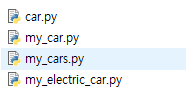

## car.py

In [11]:
"""A class that can be used to represent a car."""

class Car:
    """A simple attempt to represent a car."""

    def __init__(self, make, model, year):
        """Initialize attributes to describe a car."""
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0
        
    def get_descriptive_name(self):
        """Return a neatly formatted descriptive name."""
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()
    
    def read_odometer(self):
        """Print a statement showing the car's mileage."""
        print(f"This car has {self.odometer_reading} miles on it.")
        
    def update_odometer(self, mileage):
        """
        Set the odometer reading to the given value.
        Reject the change if it attempts to roll the odometer back.
        """
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")
    
    def increment_odometer(self, miles):
        """Add the given amount to the odometer reading."""
        self.odometer_reading += miles

class Battery:
    """A simple attempt to model a battery for an electric car."""

    def __init__(self, battery_size=75):
        """Initialize the battery's attributes."""
        self.battery_size = battery_size

    def describe_battery(self):
        """Print a statement describing the battery size."""
        print(f"This car has a {self.battery_size}-kWh battery.")
        
    def get_range(self):
        """Print a statement about the range this battery provides."""
        if self.battery_size == 75:
            range = 260
        elif self.battery_size == 100:
            range = 315
            
        print(f"This car can go about {range} miles on a full charge.")
    
class ElectricCar(Car):
    """Models aspects of a car, specific to electric vehicles."""

    def __init__(self, make, model, year):
        """
        Initialize attributes of the parent class.
        Then initialize attributes specific to an electric car.
        """
        super().__init__(make, model, year)
        self.battery = Battery()


## my_car.py

In [12]:
#from car import Car

my_new_car = Car('audi', 'a4', 2019)
print(my_new_car.get_descriptive_name())

my_new_car.odometer_reading = 23
my_new_car.read_odometer()

2019 Audi A4
This car has 23 miles on it.


## my_cars.py

In [18]:
#import car      # car module 전체 import

#my_beetle = car.Car('volkswagen', 'beetle', 2019)
my_beetle = Car('volkswagen', 'beetle', 2019)
print(my_beetle.get_descriptive_name())

#my_tesla = car.ElectricCar('tesla', 'roadster', 2019)
my_tesla = ElectricCar('tesla', 'roadster', 2019)
print(my_tesla.get_descriptive_name())

2019 Volkswagen Beetle
2019 Tesla Roadster


## my_electric_car.py

In [16]:
my_tesla = ElectricCar('tesla', 'model s', 2019)

print(my_tesla.get_descriptive_name())
my_tesla.battery.describe_battery()
my_tesla.battery.get_range()

2019 Tesla Model S
This car has a 75-kWh battery.
This car can go about 260 miles on a full charge.


In [23]:
def fib(n):
    a, b = 0, 1
    while b < n:
        print(b, end=' ')
        a, b = b, a+b
    print()

In [24]:
fib(100)

1 1 2 3 5 8 13 21 34 55 89 
